In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [16]:
movies_metadata = pd.read_csv('movies.csv')
movies_metadata = movies_metadata[['movieId', 'title', 'genres']]
ratings = pd.read_csv('ratings.csv')
avg_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
movies_metadata = pd.merge(movies_metadata, avg_ratings, on='movieId')
movies_metadata['genres'] = movies_metadata['genres'].fillna('')

In [17]:
def convert_genres(genres_string):
    genres_list = []
    for genre in genres_string.split('|'):
        genres_list.append(genre)
    return genres_list

In [18]:
movies_metadata['genres'] = movies_metadata['genres'].apply(convert_genres)
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(movies_metadata['genres'].apply(lambda x: ' '.join(x)))
cosine_similarity_matrix = cosine_similarity(count_matrix)

In [19]:
def get_recommendations(title, cosine_similarity_matrix, movies_metadata):
    indices = pd.Series(movies_metadata.index, index=movies_metadata['title']).drop_duplicates()
    idx = indices[title]

    pairwise_similarities = list(enumerate(cosine_similarity_matrix[idx]))

    pairwise_similarities = sorted(pairwise_similarities, key=lambda x: x[1], reverse=True)

    pairwise_similarities = pairwise_similarities[1:11]
    movie_indices = [i[0] for i in pairwise_similarities]

    return movies_metadata['title'].iloc[movie_indices]

In [20]:
recommendations = get_recommendations('Toy Story (1995)', cosine_similarity_matrix, movies_metadata)
print(recommendations)

avg_ratings_by_genre = movies_metadata.explode('genres').groupby('genres')['rating'].mean().sort_values(ascending=False)

1705                                          Antz (1998)
2353                                   Toy Story 2 (1999)
2805       Adventures of Rocky and Bullwinkle, The (2000)
2996                     Emperor's New Groove, The (2000)
3563                                Monsters, Inc. (2001)
6177                                     Wild, The (2006)
6469                               Shrek the Third (2007)
6931                       Tale of Despereaux, The (2008)
7742    Asterix and the Vikings (Astérix et les Viking...
8201                                         Turbo (2013)
Name: title, dtype: object


Text(0.5, 0, 'Genre')

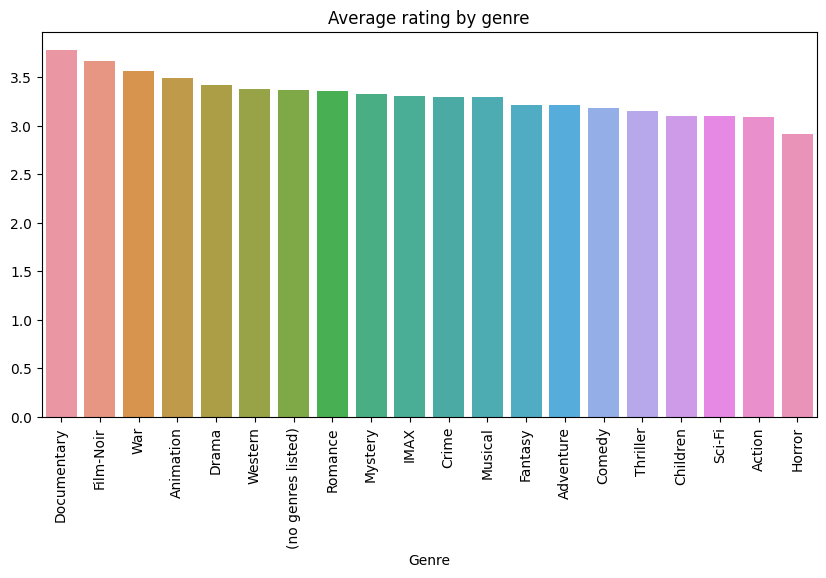

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_ratings_by_genre.index, y=avg_ratings_by_genre.values)
plt.title('Average rating by genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')